Importing the required functions to simulate the circuit.

In [45]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.extensions import UnitaryGate
from math import sqrt

The value of n can be changed over here depending upon the number of qubits to simulate.

In [46]:
n = 5
N = 2 ** n

This initalises the qubits in the uniform state by applying a Hadamard gate to every qubit in the zero state.

In [47]:
def initialize(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

The matrix that simulates the amplitude negation behaviour of the provided black box.

In [48]:
def get_oracle_matrix(N, values):
    oracle_matrix = np.identity(N)
    for value in values:
        oracle_matrix[value][value] = -1
    return oracle_matrix

The matrix that simulates inversion across mean.

In [49]:
def get_diffusion_matrix(N):
    diffusion_matrix = np.zeros((N, N), dtype = float)
    diffusion_matrix.fill(2 / N)
    diffusion_matrix -= np.identity(N)
    return diffusion_matrix

Here the values array can be edited and the desirables values in the range $[0, N - 1]$ can be entered.

In [79]:
values = [2, 3, 4]

Make a Gate out of the unitary matrices.

In [80]:
oracle_matrix = get_oracle_matrix(N, values)
oracle_unitary_gate = UnitaryGate(oracle_matrix)

In [81]:
diffusion_matrix = get_diffusion_matrix(N)
diffusion_unitary_gate = UnitaryGate(diffusion_matrix)

Initalise the Quantum Circuit and run the negation, inversion iterations for the required number of times.

In [82]:
qc = QuantumCircuit(n)
qc = initialize(qc, [x for x in range(n)])

for i in range(int(sqrt(N / len(values)))):
    qc.unitary(oracle_matrix, [x for x in range(n)])
    qc.unitary(diffusion_matrix, [x for x in range(n)])
qc.draw()

┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     ├───┤│          ││          ││          ││          ││          │»
q_1: ┤ H ├┤1         ├┤1         ├┤1         ├┤1         ├┤1         ├»
     ├───┤│          ││          ││          ││          ││          │»
q_2: ┤ H ├┤2 unitary ├┤2 unitary ├┤2 unitary ├┤2 unitary ├┤2 unitary ├»
     ├───┤│          ││          ││          ││          ││          │»
q_3: ┤ H ├┤3         ├┤3         ├┤3         ├┤3         ├┤3         ├»
     ├───┤│          ││          ││          ││          ││          │»
q_4: ┤ H ├┤4         ├┤4         ├┤4         ├┤4         ├┤4         ├»
     └───┘└──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
«     ┌──────────┐
«q_0: ┤0         ├
«     │          │
«q_1: ┤1         ├
«     │          │
«q_2: ┤2 unitary ├
«     │          │
«q_3: ┤3         ├
«     │          │
«q_4: ┤4         ├
«     └──────────┘

Display result.

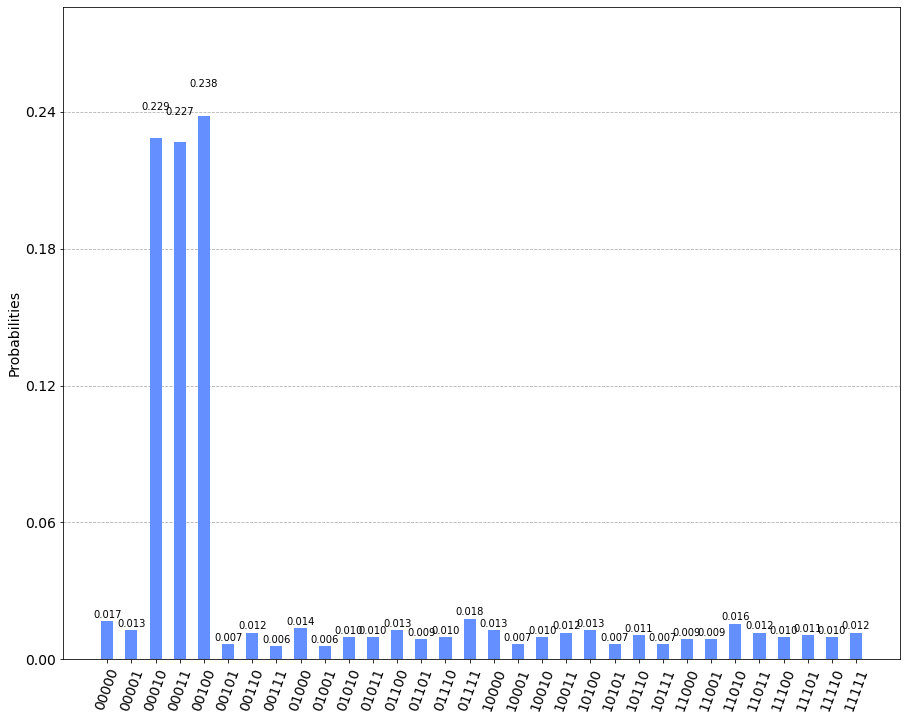

In [83]:
qc.measure_all()

qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer, figsize = (15, 12))

### Going beyond $\sqrt{(N)}$ queries.

Enter the number of extra queries to see the result as mentioned in the tutorial sheet.

In [93]:
extra_queries = 3

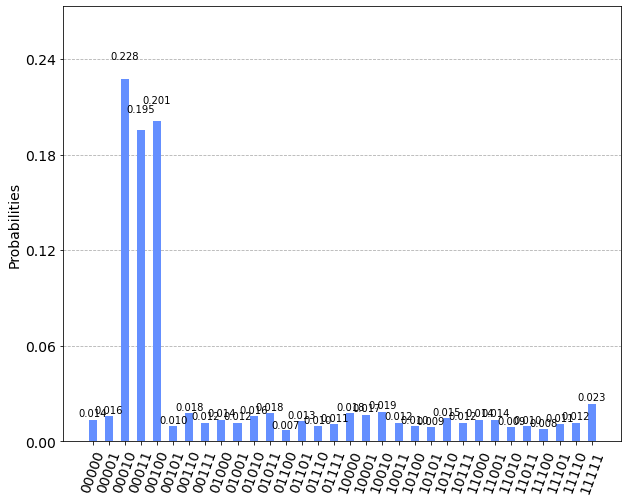

In [94]:
qc = QuantumCircuit(n)
qc = initialize(qc, [x for x in range(n)])

for i in range(int(sqrt(N / len(values))) + extra_queries):
    qc.unitary(oracle_matrix, [x for x in range(n)])
    qc.unitary(diffusion_matrix, [x for x in range(n)])
    
qc.measure_all()
qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer, figsize = (10, 8))